# Part 5: Use the pre-trained model VGG16.

Sections:

🧬 Fine-Tuning
- Load pre-trained model and modify the classifier head
- Freeze base layers 

📈 Evaluate Performance
- Metrics and confusion matrix

📝 Compare Results
- Compare performance with your custom CNN developed from scratch

🎯 Model Selection
- Justification why we decided to pick this model


# 🧬 Load and Split the dataset
- Load pre-trained model and modify the classifier head
- Freeze base layers 

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define transforms specific to VGG16
vgg_transform = transforms.Compose([ 
    transforms.Resize((224, 224)),
    transforms.ToTensor(), # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # Normalize with VGG mean
                         std=[0.229, 0.224, 0.225])
])

# Load dataset with VGG-style transforms
dataset_path = '../../data/animals10/'  # or your actual dataset path
vgg_dataset = ImageFolder(root=dataset_path, transform=vgg_transform)

# Split dataset (80% train, 20% val)
val_size = int(0.2 * len(vgg_dataset))
train_size = len(vgg_dataset) - val_size
train_dataset, val_dataset = random_split(vgg_dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Get number of classes
num_classes = len(vgg_dataset.classes)
print(f"Classes: {vgg_dataset.classes}")
print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}")


Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Train: 20944, Val: 5235


# 🧬 VGG16 - Fine-Tuning
- Load pre-trained model and modify the classifier head
- Freeze base layers 

In [4]:

import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms

# Load pretrained VGG16
vgg16 = models.vgg16(pretrained=True)

# Freeze all convolutional layers (the feature extractor part)
for param in vgg16.features.parameters():
    param.requires_grad = False

# Replace the classifier head with a new one for 10 classes
vgg16.classifier[6] = nn.Linear(4096, 10)  # ← Hardcoded since I know it's 10 classes

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16.to(device)


/home/luisguimaraes/Documents/Ironhack/Project2/Group1Project2/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/luisguimaraes/Documents/Ironhack/Project2/Group1Project2/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# 🚀 VGG16 Transfer Learning


Epoch 1/10


100%|██████████| 655/655 [01:03<00:00, 10.36it/s]


Train Loss: 0.2196, Accuracy: 0.9320
Val Loss: 0.1512, Accuracy: 0.9522
✅ Model improved. Saved.

Epoch 2/10


100%|██████████| 655/655 [00:56<00:00, 11.68it/s]


Train Loss: 0.1709, Accuracy: 0.9478
Val Loss: 0.1382, Accuracy: 0.9585
✅ Model improved. Saved.

Epoch 3/10


100%|██████████| 655/655 [00:55<00:00, 11.77it/s]


Train Loss: 0.1627, Accuracy: 0.9515
Val Loss: 0.1434, Accuracy: 0.9597
⏳ No improvement. Patience 1/3

Epoch 4/10


100%|██████████| 655/655 [00:55<00:00, 11.84it/s]


Train Loss: 0.1588, Accuracy: 0.9540
Val Loss: 0.1583, Accuracy: 0.9589
⏳ No improvement. Patience 2/3

Epoch 5/10


100%|██████████| 655/655 [00:55<00:00, 11.90it/s]


Train Loss: 0.1543, Accuracy: 0.9548
Val Loss: 0.1630, Accuracy: 0.9570
⏳ No improvement. Patience 3/3
⛔ Early stopping.


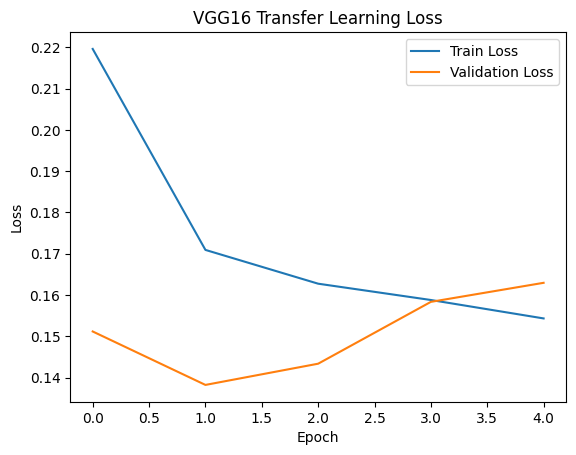

In [5]:
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define the path to the best model
best_model = '../../models/best_vgg16_model_luis.pth'

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier[6].parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses, val_losses = [], []
best_val_loss = float('inf')
patience = 2
epochs_no_improve = 0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    vgg16.train()
    running_loss, correct, total = 0.0, 0, 0

    # Training
    for inputs, labels in tqdm(train_loader):  
        # Move the input data (images) and labels (targets) to the GPU
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Reset the gradients of the optimizer to zero before backpropagation
        optimizer.zero_grad()
        
        # Perform a forward pass through the model to get predictions
        outputs = vgg16(inputs)
        
        # Calculate the loss between the model's predictions and the true labels
        loss = criterion(outputs, labels)
        
        # Perform backpropagation to compute gradients of the loss with respect to model parameters
        loss.backward()
        
        # Update the model's parameters using the computed gradients
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

    # Validation
    vgg16.eval()
    val_running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = vgg16(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    val_loss = val_running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    print(f"Val Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(vgg16.state_dict(), best_model)
        print("✅ Model improved. Saved.")
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f"⏳ No improvement. Patience {epochs_no_improve}/{patience}")
        if epochs_no_improve >= patience:
            print("⛔ Early stopping.")
            break

# Plot loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("VGG16 Transfer Learning Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# 🔢 Evaluation for VGG16

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the best saved VGG16 model
vgg16.load_state_dict(torch.load('../../models/best_vgg16_model_luis.pth'))
vgg16.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Evaluation metrics
acc = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
rec = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")


✅ Accuracy: 0.9585
✅ Precision: 0.9588
✅ Recall: 0.9585
✅ F1 Score: 0.9586


# 📈 Confusion Matrix 

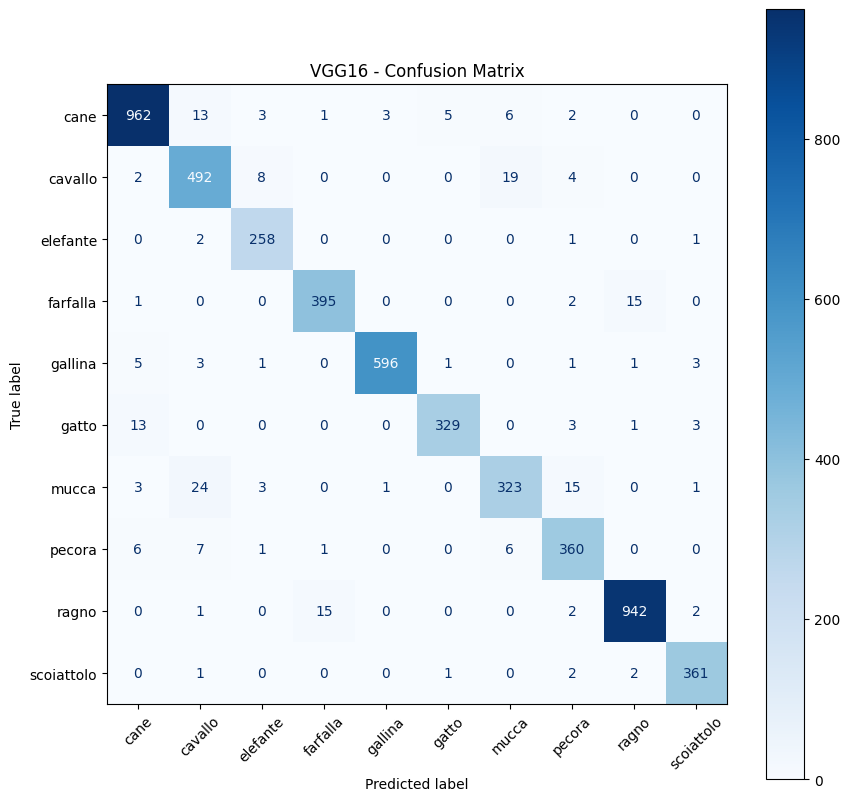

In [7]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vgg_dataset.classes)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("VGG16 - Confusion Matrix")
plt.grid(False)
plt.show()


-----
# 🧪 Custom CNN vs. VGG16 – Confusion Matrix Comparison


## 📝 Final Summary: Custom CNN vs VGG16

In this project, I implemented image classification using both a custom CNN and a pre-trained VGG16 model via transfer learning.

- The **custom CNN** achieved **93% validation accuracy**. However, it struggled to distinguish between similar animals like *gatto*, *mucca*, and *pecora*, which resulted in misclassifications.

- The **VGG16 model**, pre-trained on ImageNet, significantly outperformed the custom model, with **96% accuracy**. Its confusion matrix revealed a much sharper diagonal pattern, with highly accurate predictions and very good generalization.

These results demonstrate the **advantages of transfer learning**, showing that using a model trained on dataset like ImageNet can sgnificantly increase the performance.


## Model Justification

We chose VGG16 for transfer learning because of its performance on image classification tasks and its well-understood architecture. 
Using VGG16 is less complex, making it suitable for datasets like Animals-10.
